In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [10]:
filename = 'chessboard.jpg'
img = cv2.imread('sIMG_2164.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]
cv2.imshow('dst',img)
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

In [11]:
filename = 'chessboard2.jpg'
img = cv2.imread('sIMG_2164.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# find Harris corners
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)
ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)
# find centroids
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)
# define the criteria to stop and refine the corners
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)
# Now draw them
res = np.hstack((centroids,corners))
res = np.int0(res)
img[res[:,1],res[:,0]]=[0,0,255]
img[res[:,3],res[:,2]] = [0,255,0]
cv2.imwrite('subpixel5.png',img)


C:\Users\U209-23\AppData\Local\Temp\ipykernel_8948\172035784.py:17: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  res = np.int0(res)


True

C:\Users\U209-23\AppData\Local\Temp\ipykernel_8948\218477091.py:4: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


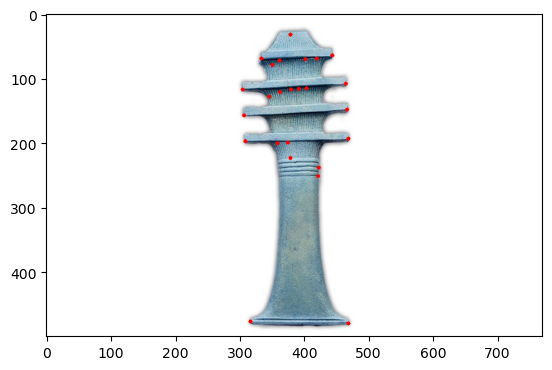

(<matplotlib.image.AxesImage at 0x1d787a90220>, None)

In [12]:
img = cv2.imread('Djed.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),3,255,-1)
plt.imshow(img),plt.show()

##### Introduction to SIFT (Scale-Invariant Feature Transform)

In [6]:
img = cv2.imread('view5.png')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sift = cv2.SIFT_create()
kp, des = sift.detectAndCompute(gray,None)
img=cv2.drawKeypoints(gray,kp,img)

cv2.imwrite('sift_view5.png',img)

True

In [12]:
img1 = cv2.imread('matchHomography/book.png',0) # queryImage
img2 = cv2.imread('matchHomography/books.jpg',0) # trainImage

sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matcher = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches = matcher.match(des1, des2)
# Sort them in the order of their distance.

matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.


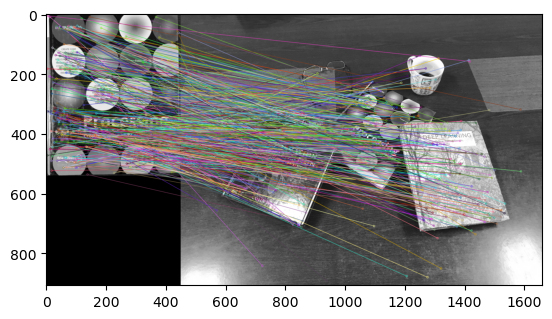

(<matplotlib.image.AxesImage at 0x234357d8d90>, None)

In [13]:
img3 = cv2.drawMatches(img1,kp1,img2,kp2, matches, None, \
    flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()